#Telecom X - Análisis de Evasión de Clientes


Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

Churn: si el cliente dejó o no la empresa. Relevante para la determinacion de los motivos del abandono.

Principalmente se analizaran el churn, medio de pago, costo total, ternure, servicio de internet, y tipo de contrato.



## Carga de datos

In [ ]:
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()
df = pd.json_normalize(data)



## Inspeccion inicial del dataset

In [ ]:
print(df.dtypes)
print('------------------------------------------------------------------------------------ \n')
print(df.isnull().sum())
print('------------------------------------------------------------------------------------ \n')
print(df.describe())
print('------------------------------------------------------------------------------------ \n')
print(df.info())
print('------------------------------------------------------------------------------------ \n')

df[df['account.Charges.Total'] == ' ']


customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object
------------------------------------------------------------------------------------ 

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


- No se encontraron valores nulos.
- Se identificaron valores vacios (" ") en la columna account.Charges.Total.
- Hay columnas numericas que tienen object como dtype y variables categoricas representadas como texto.

Posteriormente se realizara:

1- Normalizacion de datos.

2- Codificacion de variables binarias.

3- Renombrado de columnas.

## Limpieza y preparación de datos

### Normalización de valores faltantes

Se encontraron 11 valores vacíos en TotalCharges correspondientes a clientes con tenure = 0. Dado que estos clientes aún no han generado cargos efectivos, se imputara el valor 0 para evitar sesgos en el análisis posterior

In [ ]:
filtro_account_charges_total = df['account.Charges.Total'] == ' '
df.loc[filtro_account_charges_total, 'account.Charges.Total'] = 0
df['account.Charges.Total']= df['account.Charges.Total'].astype(float)
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


### Conversión de tipos

Se realizara el pase de Yes y No, de cada variable categorica a 1 y 0 respectivamente para facilitar el posterior analisis.

#### Churm

In [ ]:
df['Churn'] = (df['Churn'] == 'Yes').astype(int)
df['Churn'].value_counts()

,count
Churn,
0,5398
1,1869


####customer.Dependents

In [ ]:
df['customer.Dependents']
df['customer.Dependents'] = (df['customer.Dependents'] == 'Yes').astype(int)
df['customer.Dependents'].value_counts()

,count
customer.Dependents,
0,5086
1,2181


####customer.Partner

In [ ]:
df['customer.Partner']
df['customer.Partner'] = (df['customer.Partner'] == 'Yes').astype(int)
df['customer.Partner'].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   int64  
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   int64  
 5   customer.Dependents        7267 non-null   int64  
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

###Renombrado de columnas

In [ ]:
df.columns = [
    'Id_cliente',
    'Abandono',
    'Genero',
    'Jubilado',
    'Tiene_pareja',
    'Tiene_dependientes',
    'Meses_antiguedad',
    'Servicio_telefono',
    'Lineas_multiples',
    'Tipo_internet',
    'Seguridad_online',
    'Respaldo_online',
    'Proteccion_dispositivo',
    'Soporte_tecnico',
    'Streaming_tv',
    'Streaming_peliculas',
    'Tipo_contrato',
    'Factura_sin_papel',
    'Metodo_pago',
    'Cargo_mensual',
    'Cargo_total'
]
df

,Id_cliente,Abandono,Genero,Jubilado,Tiene_pareja,Tiene_dependientes,Meses_antiguedad,Servicio_telefono,Lineas_multiples,Tipo_internet,...,Respaldo_online,Proteccion_dispositivo,Soporte_tecnico,Streaming_tv,Streaming_peliculas,Tipo_contrato,Factura_sin_papel,Metodo_pago,Cargo_mensual,Cargo_total
0,0002-ORFBO,0,Female,0,1,1,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,0,Male,0,0,0,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,1,Male,0,1,0,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,0,Male,0,0,0,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,0,Male,0,1,1,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


###Crear Columna Cuentas_Diarias

In [ ]:
df['Cuentas_Diarias']= (df['Cargo_total']/30).round(2)
df

,Id_cliente,Abandono,Genero,Jubilado,Tiene_pareja,Tiene_dependientes,Meses_antiguedad,Servicio_telefono,Lineas_multiples,Tipo_internet,...,Proteccion_dispositivo,Soporte_tecnico,Streaming_tv,Streaming_peliculas,Tipo_contrato,Factura_sin_papel,Metodo_pago,Cargo_mensual,Cargo_total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,19.78
1,0003-MKNFE,0,Male,0,0,0,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,18.08
2,0004-TLHLJ,1,Male,0,0,0,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,9.36
3,0011-IGKFF,1,Male,1,1,0,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,41.26
4,0013-EXCHZ,1,Female,1,1,0,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,8.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,24.76
7263,9992-RRAMN,1,Male,0,1,0,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,62.46
7264,9992-UJOEL,0,Male,0,0,0,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,3.09
7265,9993-LHIEB,0,Male,0,1,1,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,154.26


## Análisis Exploratorio de Datos

### Análisis descriptivo

In [ ]:
df[['Meses_antiguedad', 'Cargo_mensual', 'Cargo_total']].describe()


,Meses_antiguedad,Cargo_mensual,Cargo_total
count,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,2277.182035
std,24.571773,30.129572,2268.648587
min,0.000000,18.250000,0.000000
25%,9.000000,35.425000,396.200000
50%,29.000000,70.300000,1389.200000
75%,55.000000,89.875000,3778.525000
max,72.000000,118.750000,8684.800000


###Análisis general del churn


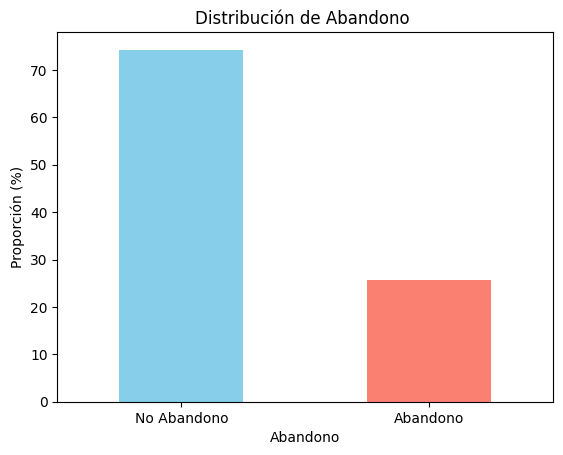

In [ ]:

fig, ax = plt.subplots()
conteo = df['Abandono'].value_counts(normalize=True).sort_index()*100
conteo.plot(color=['skyblue', 'salmon'], title='Distribución de Abandono ', kind='bar', ax=ax)
ax.set_xlabel('Abandono')
ax.set_ylabel('Proporción (%)')
ax.set_xticklabels(['No Abandono', 'Abandono'], rotation=0)
plt.show()




Se observa un abandono de aproximadamente un cuarto de los clientes, esto supone una dificultan en relacion a la retencion.

### Análisis por antigüedad

/tmp/ipython-input-3253197970.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analisis_temporal = df.groupby('Rango_Antiguedad')['Abandono'].mean() * 100


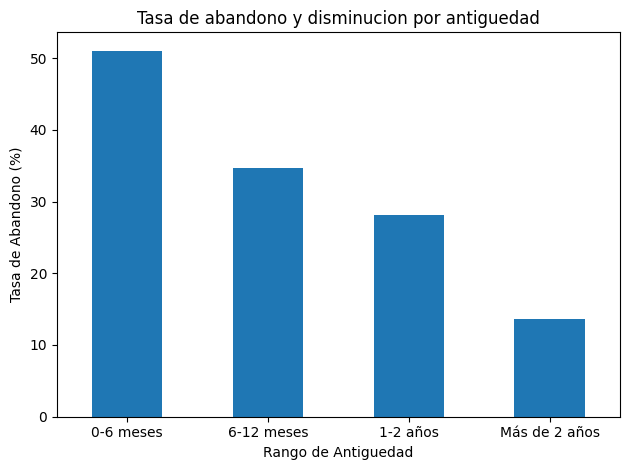

In [ ]:
bins = [0, 6, 12, 24, df['Meses_antiguedad'].max()]
labels = ['0-6 meses', '6-12 meses', '1-2 años', 'Más de 2 años']
df['Rango_Antiguedad'] = pd.cut(df['Meses_antiguedad'], bins=bins, labels=labels, include_lowest=True)
analisis_temporal = df.groupby('Rango_Antiguedad')['Abandono'].mean() * 100
fig,ax= plt.subplots()
analisis_temporal.plot(kind='bar', ax=ax)
ax.set_title('Tasa de abandono y disminucion por antiguedad')
ax.set_xlabel('Rango de Antiguedad')
ax.set_xticklabels(labels, rotation=0)
ax.set_ylabel('Tasa de Abandono (%)')
plt.tight_layout()
plt.show()

Se evaluo la tasa de abandono en funcion de la antiguedad del cliente agrupando los meses de antiguedad en rangos. Se puede observar que la mayor parte de los abandonos ocurren en los primeros meses de relacion con la empresa y a medida que aumenta la antiguedad los abandonos disminuyen.

### Análisis por tipo de contrato


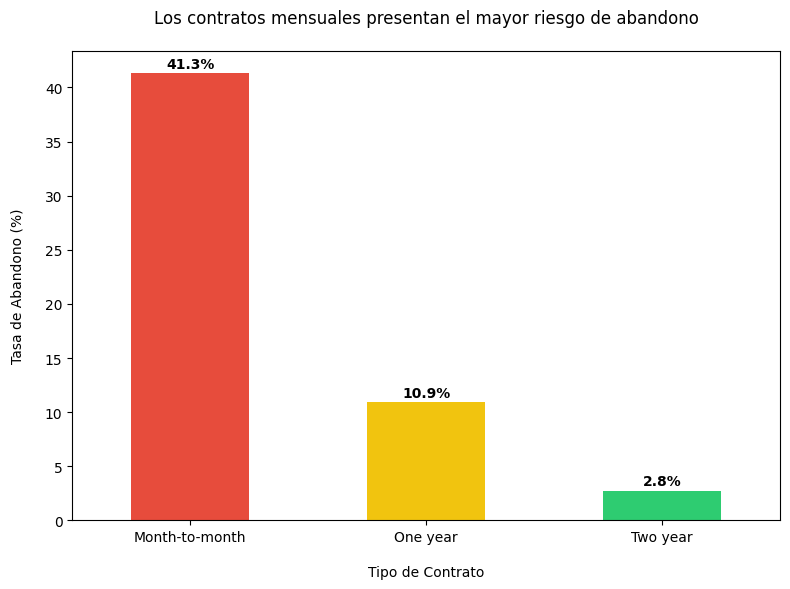

In [ ]:
riesgo_contratos = df.groupby('Tipo_contrato')['Abandono'].mean() * 100
fig, ax= plt.subplots()
riesgo_contratos.plot(kind='bar',ax=ax,color=['#e74c3c', '#f1c40f', '#2ecc71'], figsize=(8, 6))
ax.set_title('Los contratos mensuales presentan el mayor riesgo de abandono',pad=20)
ax.set_xlabel('Tipo de Contrato',labelpad=15)
ax.set_ylabel('Tasa de Abandono (%)',labelpad=15)
plt.xticks(rotation=0)
for i, v in enumerate(riesgo_contratos):
    ax.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

El analisis por tipo de contrato muestra que los clientes con contrato Month-to-month presentan una significativamente mayor tasa de abandono con respecto a los otros tipos de contrato, esta diferencia es incluso mas marcada que la observada en la comparacion de la antiguedad. Este tipo de contrato tiene un rol fundamental en el abandono de los clientes.

### Analisis por tipo de internet

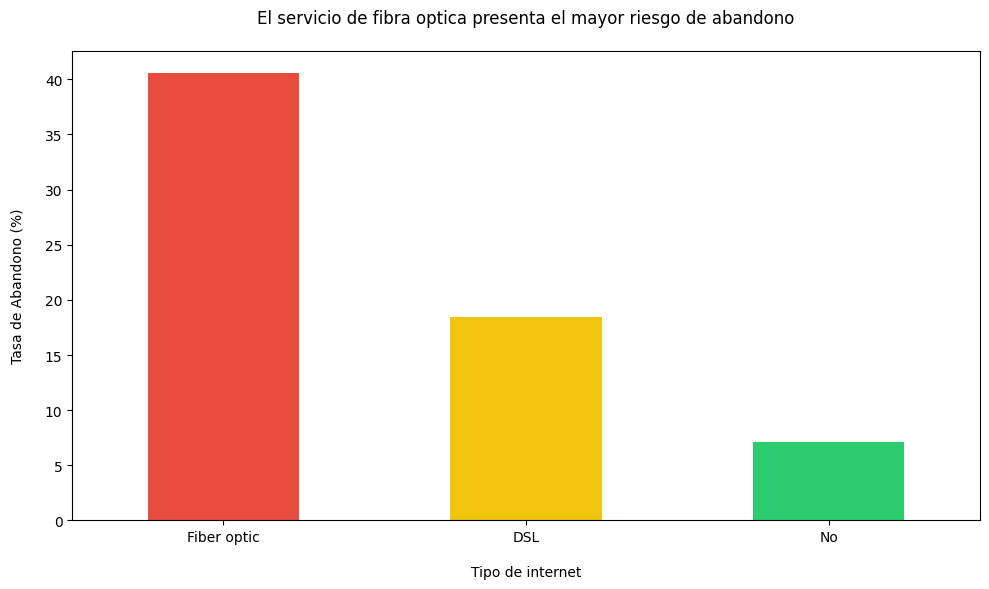

In [ ]:
riesgo_internet = (df.groupby('Tipo_internet')['Abandono'].mean() * 100).sort_values(ascending=False)
fig, ax= plt.subplots()
riesgo_internet.plot(kind='bar', ax=ax, color=['#e74c3c', '#f1c40f', '#2ecc71'], figsize=(10, 6))
ax.set_title('El servicio de fibra optica presenta el mayor riesgo de abandono',pad=20)
ax.set_xlabel('Tipo de internet',labelpad=15)
ax.set_ylabel('Tasa de Abandono (%)',labelpad=15)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

El analisis por tipo de internet revela que aquellos que contratan fibra optica tienen una tasa de abandono considerablemente mas elevada que aquellos que contratan DSL o no tienen servicio de internet. Puede estar provocado por problemas tecnicos, calidad del servicio o precios.

#Dataframe abandonos

In [ ]:
df_abandonos=df[df['Abandono']==True].copy()
df_abandonos.value_counts().sort_values(ascending=False)
df_abandonos.drop(columns=['Id_cliente','Abandono'],inplace=True)
print(df_abandonos['Tipo_contrato'].value_counts())
print("\n -------------------------------------------------")
print(df_abandonos['Meses_antiguedad'].value_counts())
print("Se encontro una fuga enorme antes de los primeros 6 meses de contrato del usuario")
print("\n")
print(df_abandonos['Meses_antiguedad'].mean())
print("\n")
print(" MEDIA MUCHO MAS BAJA QUE EN EL DATAFRAME DE CLIENTES QUE NO ABANDONARON EL SERVICIO: \n MEDIA DE ANTIGUEDAD ABANDONOS: \n 19.43\n MEDIA DE ANTIGUEDAD DE NO ABANDONOS:\n 37.56")
print("\n -------------------------------------------------")
print("Contratos con mas abandonos: Month-to-month\nCon menos abandonos: Month-to-month ")
print(df_abandonos['Metodo_pago'].value_counts())
print("\n migrar a los usuarios que pagen con Electronic check a otro medio de pago podria ayudar")
print("\n -------------------------------------------------")
print(df_abandonos['Tipo_internet'].value_counts())
print("Fibra Optica presenta mas del doble de abandonos de DSL, puede ser un problema tecnico")
print("\n -------------------------------------------------")
abandonos_internet = df_abandonos['Tipo_internet'].value_counts()
total_internet = df['Tipo_internet'].value_counts()

riesgo_internet = (abandonos_internet / total_internet) * 100
print(f"El riesgo de abandono por servicio de internet es de: \n{riesgo_internet.sort_values(ascending=False)}")

print("\n -------------------------------------------------")
abandonos_medio_pago = df_abandonos['Metodo_pago'].value_counts()
total_medio_pago = df['Metodo_pago'].value_counts()

riesgo_medio_pago = (abandonos_medio_pago/ total_medio_pago) * 100
print(f"El riesgo de abandono por tipo de contrato es de: \n{riesgo_medio_pago.sort_values(ascending=False)}")
print("\n -------------------------------------------------")
abandonos_contratos = df_abandonos['Tipo_contrato'].value_counts()
total_contratos = df['Tipo_contrato'].value_counts()

riesgo_contratos = (abandonos_contratos / total_contratos) * 100
print(f"El riesgo de abandono por tipo de contrato es de: \n{riesgo_contratos.sort_values(ascending=False)}")
print("\n -------------------------------------------------")
print("En resumen seria recomendable buscar contratos de 2 años (menor riesgo de abandono), incentivar cambiar el medio de pago de Electronic check (mas riesgoso) a Credit card (automatic), y revisar el servicio de fibra optica.")

Tipo_contrato
Month-to-month    1655
One year           166
Two year            48
Name: count, dtype: int64

 -------------------------------------------------
Meses_antiguedad
1     380
2     123
3      94
4      83
5      64
     ... 
72      6
44      6
62      5
64      4
63      4
Name: count, Length: 72, dtype: int64
Se encontro una fuga enorme antes de los primeros 6 meses de contrato del usuario


17.979133226324237


 MEDIA MUCHO MAS BAJA QUE EN EL DATAFRAME DE CLIENTES QUE NO ABANDONARON EL SERVICIO: 
 MEDIA DE ANTIGUEDAD ABANDONOS: 
 19.43
 MEDIA DE ANTIGUEDAD DE NO ABANDONOS:
 37.56

 -------------------------------------------------
Contratos con mas abandonos: Month-to-month
Con menos abandonos: Month-to-month 
Metodo_pago
Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: count, dtype: int64

 migrar a los usuarios que pagen con Electronic check a otro medio de pago podria ayudar


#Dataframe clientes que no abandonaron

In [ ]:
df_clientes=df[df['Abandono']==False].copy()
df_clientes.value_counts().sort_values(ascending=False)
df_clientes.drop(columns=['Id_cliente','Abandono'],inplace=True)
print(df_clientes['Tipo_contrato'].value_counts())
print("\n -------------------------------------------------")
print(df_clientes['Meses_antiguedad'].value_counts())
print("\n -------------------------------------------------")
print(df_clientes['Meses_antiguedad'].mean())
print("\n -------------------------------------------------")
print(df_clientes['Metodo_pago'].value_counts())
print("\n -------------------------------------------------")
print(df_clientes['Tipo_internet'].value_counts())
df_clientes.info()


Tipo_contrato
Month-to-month    2350
Two year          1695
One year          1353
Name: count, dtype: int64

 -------------------------------------------------
Meses_antiguedad
72    363
1     254
71    170
2     123
3     113
     ... 
38     47
21     47
39     45
36     40
0      11
Name: count, Length: 73, dtype: int64

 -------------------------------------------------
37.321044831419044

 -------------------------------------------------
Metodo_pago
Electronic check             1374
Mailed check                 1357
Credit card (automatic)      1336
Bank transfer (automatic)    1331
Name: count, dtype: int64

 -------------------------------------------------
Tipo_internet
DSL            2029
Fiber optic    1901
No             1468
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 5398 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Genero    

#PENDIENTES
- COMPARAR DF ABANDONO Y NO ABANDONO EN GRAFICO
- INFORME FINAL
- Análisis de correlación entre variables (Funcion corr)
- README


# INFORME FINAL

La evasión de clientes (Churn) representa un gran desafio para cualquier empresa de servicios, ya que impacta directamente en los ingresos y en la estabilidad del negocio.

El objetivo de este análisis es identificar patrones y factores asociados al abandono de clientes a partir de un conjunto de datos históricos. A través de este estudio, se busca comprender que caracteristicas de los clientes se relacionan con el abandono de estos y generar informacion util para la toma de decisiones con respecto a su retencion.

##Limpieza y Tratamiento de Datos

Limpieza y Tratamiento de Datos

En primer lugar, se realizó la importación del conjunto de datos y una inspección general de su estructura. Se verificaron tipos de datos, valores faltantes y posibles inconsistencias.

Se llevaron a cabo tareas de limpieza y preparación, incluyendo la conversión de variables a formatos adecuados, la creación de nuevas variables derivadas (como rangos de antigüedad), la traduccion y el renombramiento de variables, y la validación de la variable objetivo Abandono.

Estas acciones permitieron asegurar la calidad de los datos y facilitar los análisis posteriores.

## Analisis exploratorio de datos

Para la visualizacion de los graficos remitirse a los siguientes enlaces:

-  [Ir al análisis de Churn](#analisis-general-del-churn)


### Distribucion del abandono

Se analizó la distribución de la variable Abandono para comprender la proporción de clientes que permanecen frente a los que cancelan el servicio, identificando la magnitud del problema de churn en la base de clientes.

###Antiguedad del cliente

El análisis por rangos de antiguedad mostró que la tasa de abandono es significativamente mayor durante los primeros meses de relación con el cliente, disminuyendo progresivamente a medida que aumenta la antiguedad. Esto sugiere que el riesgo de churn es especialmente crítico en las etapas iniciales del ciclo de vida del cliente.

### Tipo de contrato

Se observó que los clientes con contratos Month-to-month presentan una tasa de abandono considerablemente más alta que aquellos con contratos anuales o de dos años, lo que evidencia el efecto de la estabilidad contractual sobre la retención.

###Tipo de servicio de internet

El análisis por tipo de servicio de internet reveló que los clientes que utilizan fibra óptica presentan la mayor tasa de abandono, superando ampliamente a los usuarios de DSL o a aquellos sin servicio de internet.

## Conclusiones

El análisis exploratorio permitió identificar factores clave asociados a la evasión de clientes. En particular, el abandono se concentra en clientes con baja antiguedad, contratos mensuales y aquellos que utilizan el servicio de fibra óptica.

Estos patrones sugieren que la estabilidad contractual y la experiencia inicial del cliente juegan un rol fundamental en la retención, y que ciertos servicios presentan un riesgo mayor de churn.

## Recomendaciones estrategicas

Teniendo en cuenta los resultados obtenidos es recomendable:

- Implementar estrategias centradas en la retencion del cliente en sus primeros meses.

- Incentivar, ya sea a traves de descuentos o promociones, la migracion de contratos mensuales hacia contratos de mayor duracion.

- Analizar el servicio de fibra optica en busca de problemas tecnicos, de calidad, o de percepcion de valor, y mejorar la experiencia del cliente en ese sector.